## TP3(Implementation de KNN) 
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79, 99, 101]:
    print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  79, features: [5.7 2.6 3.5 1. ], label: 1
index:  99, features: [5.7 2.8 4.1 1.3], label: 1
index: 101, features: [5.8 2.7 5.1 1.9], label: 2


In [2]:
import numpy as np
print(np.random.seed(42))
indices= np.random.permutation(len(data))
n_training_samples=12
learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]
print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")

for i in range(5):
    print(f"{i:4d} {learn_data[i]}  {learn_labels[i]:3}")

print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")

for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

None
The first samples of our learn set:
index  data                label
   0 [6.1 2.8 4.7 1.2]    1
   1 [5.7 3.8 1.7 0.3]    0
   2 [7.7 2.6 6.9 2.3]    2
   3 [6.  2.9 4.5 1.5]    1
   4 [6.8 2.8 4.8 1.4]    1
The first samples of our test set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


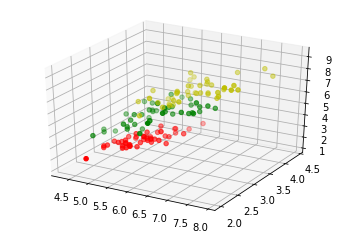

In [3]:
##  visualization de des classes de nos donnees en dimensions 3

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ("r","b")
X=  []
for iclass in range(3):
    X.append([[],[],[]])
    for i in range(len(learn_data)):
        if learn_labels[i] == iclass:
            X[iclass][0].append(learn_data[i][0])
            X[iclass][1].append(learn_data[i][1])
            X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r","g","y")
fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0],X[iclass][1], X[iclass][2], c=colours[iclass])

plt.show()

In [4]:
def distance(instance1,instance2):
    #calcul de la distance euclidienne entre 2 points
    return np.linalg.norm(np.subtract(instance1,instance2))

print(distance([3,5],[1,1]))
print(distance(learn_data[3], learn_data[44]))
    

4.47213595499958
3.4190641994557516


In [5]:
## recherche de voisin 

def get_neighbors(training_set,labels,test_instance,k,distance):
    """
       ici on retourne des k 3-tuple ou les 3 champs sont: l'index, la distance, et le label 
       ou l'index est l'index du voisin venant du  jeux d'entrainement,
       et la distance est la distance entre l'ensemble d'entrainement et de test
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist,labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [6]:
## teston la fonction en question

for i in range(5):
    neighbors = get_neighbors(learn_data,
                             learn_labels,
                             test_data[i],
                             3,
                             distance=distance)
    print("Index:           ",i,"\n",
          'Testset Data:    ',test_data[i],'\n',
          "Testset Label:   ",test_labels[i],'\n',
          "Neighbors:       ", neighbors,'\n')

Index:            0 
 Testset Data:     [5.7 2.8 4.1 1.3] 
 Testset Label:    1 
 Neighbors:        [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)] 

Index:            1 
 Testset Data:     [6.5 3.  5.5 1.8] 
 Testset Label:    2 
 Neighbors:        [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)] 

Index:            2 
 Testset Data:     [6.3 2.3 4.4 1.3] 
 Testset Label:    1 
 Neighbors:        [(array([6.2, 2.2, 4.5, 1.5]), 0.26457513110645864, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)] 

Index:            3 
 Testset Data:     [6.4 2.9 4.3 1.3] 
 Testset Label:    1 
 Neighbors:        [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064

In [7]:
from collections import Counter
## creation de la fonction vote qui retourne la classe la plus courante
def vote(neighbors):
    class_counter=Counter()
    for neighbor  in neighbors:
        class_counter[neighbor[2]] +=1
    return class_counter.most_common(1)[0][0]

## testons notre fonction vote avec notre ensemble d'entrainement:

for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,
                             learn_labels,
                             test_data[i],
                             3,
                             distance=distance)
    print("index:           ",i,
          ', result of vote:  ',vote(neighbors),
          ", label:  ",test_labels[i],
          ", data: ", test_data[i])

index:            0 , result of vote:   1 , label:   1 , data:  [5.7 2.8 4.1 1.3]
index:            1 , result of vote:   2 , label:   2 , data:  [6.5 3.  5.5 1.8]
index:            2 , result of vote:   1 , label:   1 , data:  [6.3 2.3 4.4 1.3]
index:            3 , result of vote:   1 , label:   1 , data:  [6.4 2.9 4.3 1.3]
index:            4 , result of vote:   2 , label:   2 , data:  [5.6 2.8 4.9 2. ]
index:            5 , result of vote:   2 , label:   2 , data:  [5.9 3.  5.1 1.8]
index:            6 , result of vote:   0 , label:   0 , data:  [5.4 3.4 1.7 0.2]
index:            7 , result of vote:   1 , label:   1 , data:  [6.1 2.8 4.  1.3]
index:            8 , result of vote:   1 , label:   2 , data:  [4.9 2.5 4.5 1.7]
index:            9 , result of vote:   0 , label:   0 , data:  [5.8 4.  1.2 0.2]
index:            10 , result of vote:   1 , label:   1 , data:  [5.8 2.6 4.  1.2]
index:            11 , result of vote:   2 , label:   2 , data:  [7.1 3.  5.9 2.1]


In [8]:
## ici il est question de faire une fonction identique a vote mais em plus
## retourne la classe de la probabilite la plus presente
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] +=1
    labels,votes= zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][1]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

for i in range (n_training_samples):
    neighbors = get_neighbors(learn_data,
                             learn_labels,
                             test_data[i],
                             5,
                             distance=distance)
    print("index: ",i,
          ', vote_prob:    ',vote_prob(neighbors),
          ", label:   ",test_labels[i],
          ", data:       ",test_data[i])

index:  0 , vote_prob:     (5, 1.0) , label:    1 , data:        [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:     (5, 1.0) , label:    2 , data:        [6.5 3.  5.5 1.8]
index:  2 , vote_prob:     (5, 1.0) , label:    1 , data:        [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:     (5, 1.0) , label:    1 , data:        [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:     (5, 1.0) , label:    2 , data:        [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:     (4, 0.8) , label:    2 , data:        [5.9 3.  5.1 1.8]
index:  6 , vote_prob:     (5, 1.0) , label:    0 , data:        [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:     (5, 1.0) , label:    1 , data:        [6.1 2.8 4.  1.3]
index:  8 , vote_prob:     (5, 1.0) , label:    2 , data:        [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:     (5, 1.0) , label:    0 , data:        [5.8 4.  1.2 0.2]
index:  10 , vote_prob:     (5, 1.0) , label:    1 , data:        [5.8 2.6 4.  1.2]
index:  11 , vote_prob:     (5, 1.0) , label:    2 , data:        [7.1 3.  5.9 2.1]


In [9]:
## ici on fait un vote par distance Harmonique,
## afin d'Attribuer une classe a une donnees inconnues en fonction de la classe ayant le poids maximal proche dudit point

def vote_harmonic_weights(neighbors,all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
            class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)


In [10]:
## affichons le resultat de notre fonction harmonique
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,
                          learn_labels,
                          test_data[i],
                          6,
                          distance=distance)

    print("index: ", i,", result of vote: ",vote_harmonic_weights(neighbors,all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


In [11]:
## Dans l'Approche precedente, on recherche les voisins en prenant leur distance en compte
## On peut ameliorer le vote en utilisant la distance actuelle

def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
            class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [12]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,
                                learn_labels,
                                test_data[i],
                                6,
                                distance=distance)
    print("index: ", i,", result of vote: ",
    vote_distance_weights(neighbors,all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.8490154592118361), (1, 0.15098454078816387)])
index:  5 , result of vote:  (2, [(2, 0.6736137462184478), (1, 0.3263862537815521)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


In [13]:
## Autre Exemple pour de classification par plus proche voisin
## on teste notre fonction de poids avec un autre simple dataset

train_set = [(1, 2, 2),
                (-3, -2, 0),
                (1, 1, 3),
                (-3, -3, -1),
                (-3, -2, -0.5),
                (0, 0.3, 0.8),
                (-0.5, 0.6, 0.7),
                (0, 0, 0)
            ]
labels = ['apple', 'banana', 'apple',
            'banana', 'apple', "orange",
            'orange', 'orange']
k = 2
for test_instance in [(0, 0, 0), (2, 2, 2),
                        (-3, -1, 0), (0, 1, 0.9),
                        (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbors = get_neighbors(train_set,
                                labels,
                                test_instance,
                                k,
                                distance=distance)
    print("vote distance weights: ",vote_distance_weights(neighbors))

vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('banana', [('banana', 0.5294117647058824), ('apple', 0.47058823529411764)])
vote distance weights:  ('orange', [('orange', 1.0)])
vote distance weights:  ('apple', [('apple', 1.0)])
vote distance weights:  ('apple', [('apple', 0.5084745762711865), ('orange', 0.4915254237288135)])


In [15]:
## KNN en linguistique

## ici on veut voir comment les KNN reconnaissent les mots mal eppeles a l'aide de la distance de levenshtein
## importation de levenstein
from levenshtein import LD

cities = open("data/city_names.txt").readlines()
cities = [city.strip() for city in cities] ## ici on supprime les espace des villes

for city in ["Freiburg", "Frieburg", "Freiborg","Hamborg", "Sahrluis"]:
    neighbors =get_neighbors(cities,
                            cities,
                            city,
                            2,
                            distance=LD)
    print("vote_distance_weights: ", vote_distance_weights(neighbors))

vote_distance_weights:  ('Freiberg', [('Freiberg', 0.8333333333333334), ('Freising', 0.16666666666666669)])
vote_distance_weights:  ('Freiberg', [('Freiberg', 0.5), ('Lüneburg', 0.5)])
vote_distance_weights:  ('Freiberg', [('Freiberg', 0.8333333333333334), ('Freising', 0.16666666666666669)])
vote_distance_weights:  ('Hamburg', [('Hamburg', 0.7142857142857143), ('Bamberg', 0.28571428571428575)])
vote_distance_weights:  ('Saarlouis', [('Saarlouis', 0.8387096774193549), ('Bayreuth', 0.16129032258064516)])


In [16]:
## ici on veut corriger les mots mal eppele en utilisant les knn et un dictionnaire anglophone
words = []
with open("data/british-english.txt") as fh:
    for line in fh:
        word = line.strip()
        words.append(word)

In [ ]:
for word in ["holpful", "kundnoss", "holpposs", "thoes", "innerstand","blagrufoo", "liberdi"]:
    neighbors=get_neighbors(words,
                            words,
                            word,
                            3,
                            distance=LD)
    
    print("vote_distance_weights: ", vote_distance_weights(neighbors,all_results=False))
    print("vote_prob: ", vote_prob(neighbors))
    print("vote_distance_weights: ", vote_distance_weights(neighbors))